# Proyecto: Análisis de mercado inmobiliario

In [1]:
# importo las librerias principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Empezamos con un analisis exploratorio de los datos

In [2]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [4]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [5]:
#vemos los valores faltantes
print(df.isnull().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [11]:
faltantes = df.isnull().sum().max()
instancias = list(df.shape)[0]
porcentaje = faltantes/instancias
print(f'Valor maximo de valores faltantes: {faltantes}')
print(f'Cantidad de instancias : {instancias}')
print(f'Porcentaje de faltantes/instancias : {int(porcentaje*100)}%')

Valor maximo de valores faltantes: 21614
Cantidad de instancias : 146660
Porcentaje de faltantes/instancias : 14%


Vemos que hay casi un 14% de valores faltantes en la variable superficie cubierta

In [16]:
#vemos cuantos tipos de propiedad hay en el dataset
df['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [21]:
# vemos el porcentaje de Departamentos en el dataset
departamentos = df['property_type'].value_counts().head(1).sum()
print(f'{int(departamentos/instancias*100)}%')

73%


In [22]:
# cuanto pesan los principales 3 tipos de propiedad
propiedades = df['property_type'].value_counts().head(3).sum()
print(f'{int(propiedades/instancias*100)}%')

97%


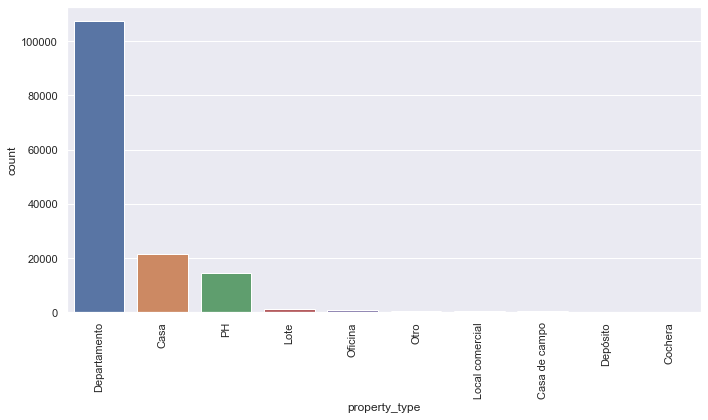

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='property_type',data=df,order=df['property_type'].value_counts().index)

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Vemos que los departamentos se llevan un gran porcentaje de los datos (73%) y si sumamos departamentos casas y PHs tenemos mas del 97% de los datos por lo cual vamos a trabajar con estos 3

In [24]:
# vemos de que regiones son las publicaciones
df['l2'].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [25]:
regiones = df['l2'].value_counts().head(1).sum()
print(f'{int(regiones/instancias*100)}%')

63%


Vemos que el 63% de los datos son de Capital Federal

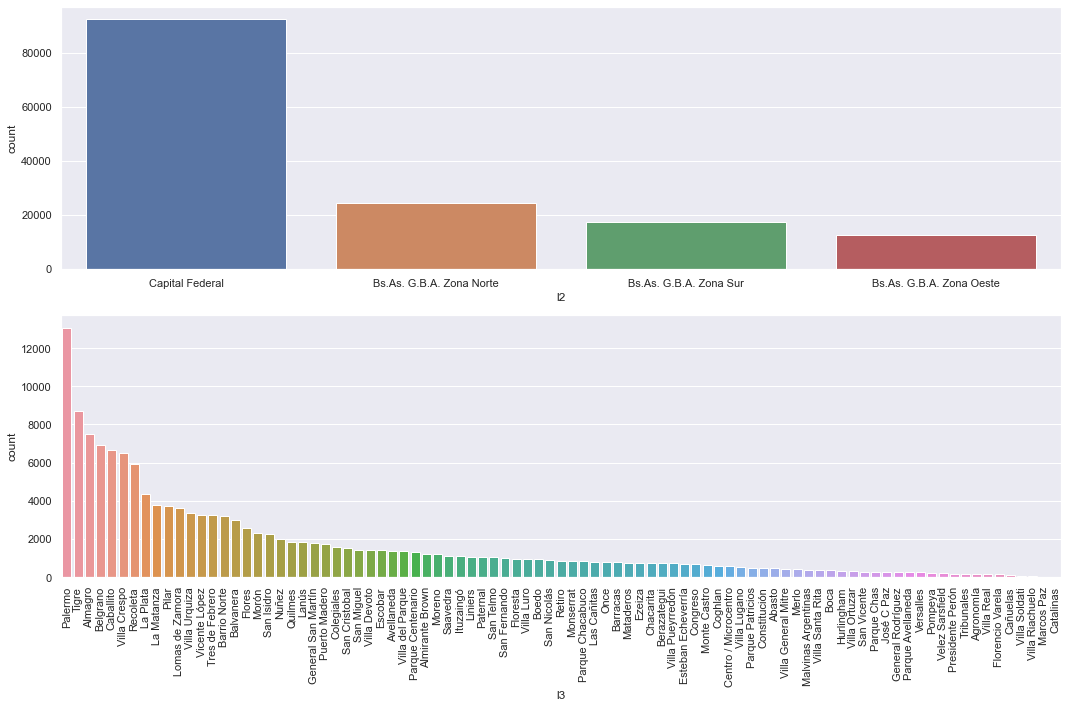

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(x = 'l2',data = df, order = df['l2'].value_counts().index)
plt.subplot(2,1,2)
sns.countplot(x = 'l3',data = df, order = df['l3'].value_counts().index)
plt.xticks(rotation = 90)
plt.tight_layout()

In [27]:
#Podemos ver como Palermo y Tigre son los barrios con mas instancias y hay muchos barrios con pocos datos

In [29]:
# Filtramos el dataset por Capital Federal y los principales tipos de propiedades
df2 = df[(df['l2'] == 'Capital Federal')]

In [30]:
df2 = df2[(df2['property_type'] == 'Departamento') | (df2['property_type'] == 'Casa')| (df2['property_type'] == 'PH') ]

In [33]:
df2.shape

(91485, 19)

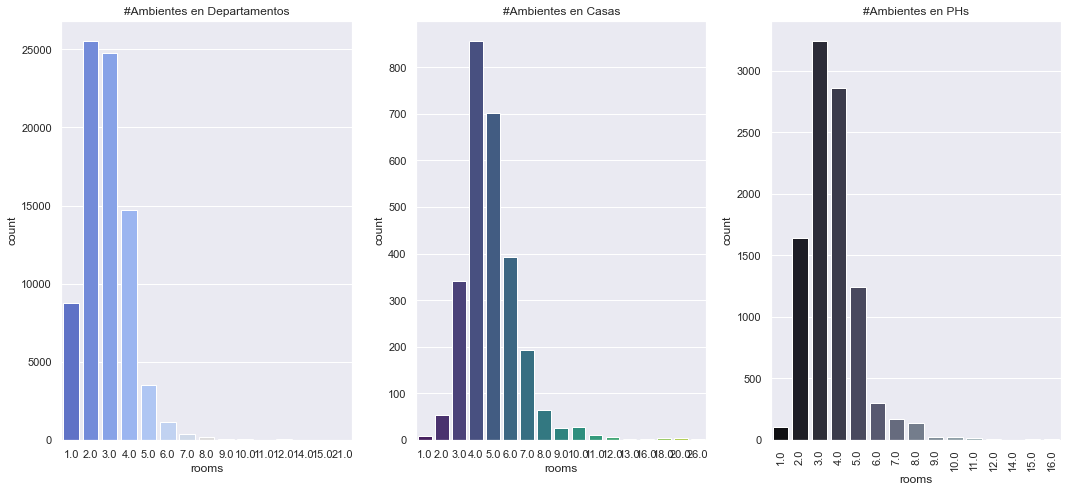

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.countplot(x = 'rooms',data = df2[df2['property_type']=='Departamento'],palette='coolwarm')
plt.title('#Ambientes en Departamentos')
plt.subplot(1,3,2)
sns.countplot(x = 'rooms',data = df2[df2['property_type']=='Casa'],palette='viridis')
plt.title('#Ambientes en Casas')
plt.subplot(1,3,3)
sns.countplot(x = 'rooms',data = df2[df2['property_type']=='PH'],palette='bone')   
plt.title('#Ambientes en PHs')
plt.xticks(rotation = 90)
plt.tight_layout()

Departamentos: Vemos que la mayoria tienen entre 2 y 3 ambientes.

Casas : Vemos que la mayoria tienen entre 4 y 5 ambientes.

PHs : Vemos que la mayoria tienen entre 3 y 4 ambientes. 

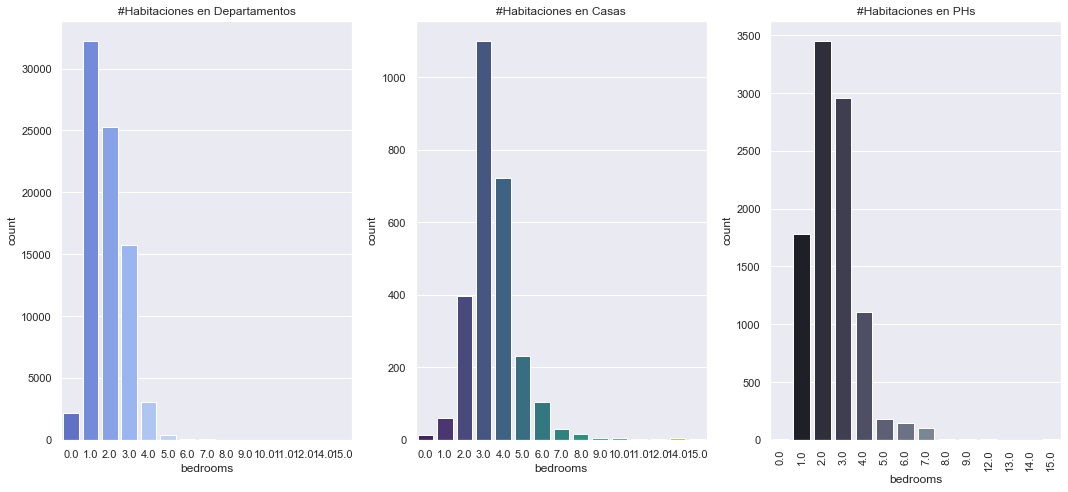

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.countplot(x = 'bedrooms',data = df2[df2['property_type']=='Departamento'],palette='coolwarm')
plt.title('#Habitaciones en Departamentos')
plt.subplot(1,3,2)
sns.countplot(x = 'bedrooms',data = df2[df2['property_type']=='Casa'],palette='viridis')
plt.title('#Habitaciones en Casas')
plt.subplot(1,3,3)
sns.countplot(x = 'bedrooms',data = df2[df2['property_type']=='PH'],palette='bone')   
plt.title('#Habitaciones en PHs')
plt.xticks(rotation = 90)
plt.tight_layout()

Departamentos: Vemos que la mayoria tienen entre 1 y 2 dormitorios.

Casas : Vemos que la mayoria tienen entre 3 y 4 dormitorios. 

PHs : Vemos que la mayoria tienen entre 2 y 3 ambientes.

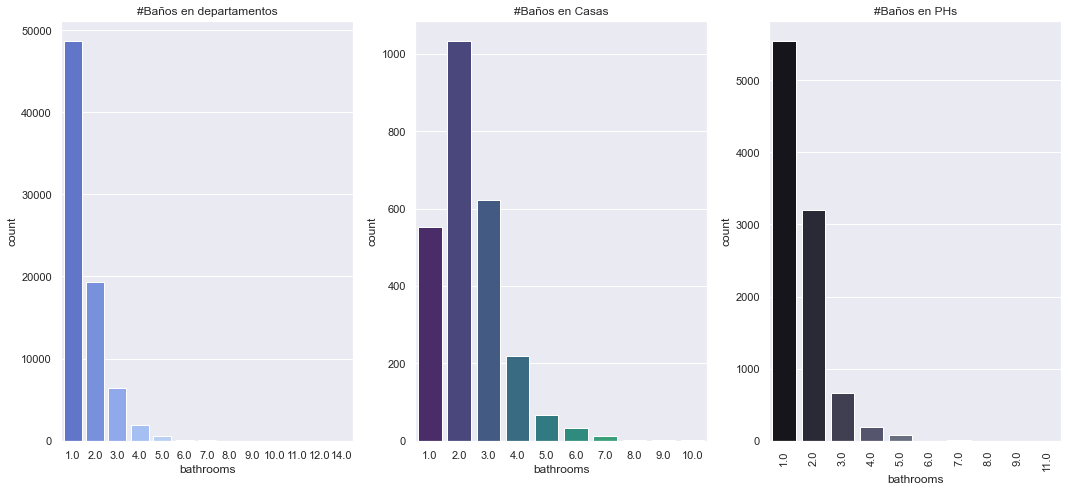

In [36]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.countplot(x = 'bathrooms',data = df2[df2['property_type']=='Departamento'],palette='coolwarm')
plt.title('#Baños en departamentos')
plt.subplot(1,3,2)
sns.countplot(x = 'bathrooms',data = df2[df2['property_type']=='Casa'],palette='viridis')
plt.title('#Baños en Casas')
plt.subplot(1,3,3)
sns.countplot(x = 'bathrooms',data = df2[df2['property_type']=='PH'],palette='bone')   
plt.title('#Baños en PHs')
plt.xticks(rotation = 90)
plt.tight_layout()

Departamentos: Vemos que la mayoria tienen entre 1 y 2 baños.

Casas : Vemos que la mayoria tienen entre 2 y 3 baños. 

PHs : Vemos que la mayoria tienen entre 1 y 2 baños.

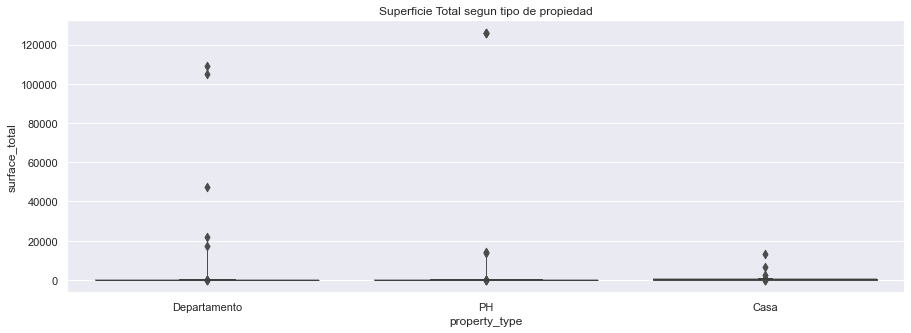

In [37]:
plt.figure(figsize=(15,5))
plt.title('Superficie Total segun tipo de propiedad')
sns.boxenplot(y='surface_total',x='property_type',data=df2)
plt.show()

Vemos que el grafico es poco util ya que hay valores demasiado altos. No existen departamentos de 120.000m2

Filtramos los datos por superficie total mayor a 30 m2 y menor a 1000m2 ya que en ese rango se encuentra la mayor cantidad de datos

In [38]:
 df2 = df2[(df2['surface_total']>30) & (df2['surface_total']<1000)]

In [39]:
df2 = df2[(df2['surface_total'])>(df2['surface_covered'])]

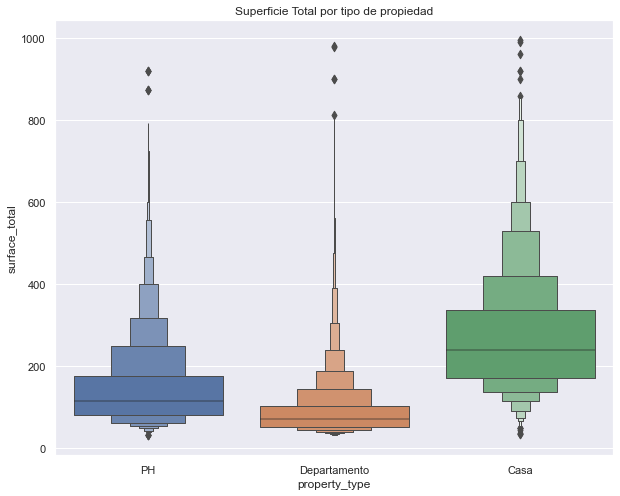

In [40]:
plt.figure(figsize=(10,8))
sns.boxenplot(y='surface_total',x='property_type',data=df2)
plt.title('Superficie Total por tipo de propiedad')
plt.show()

Vemos que logicamente las casas tienen mayores superficies. seguido por los PHs y luego los departamentos

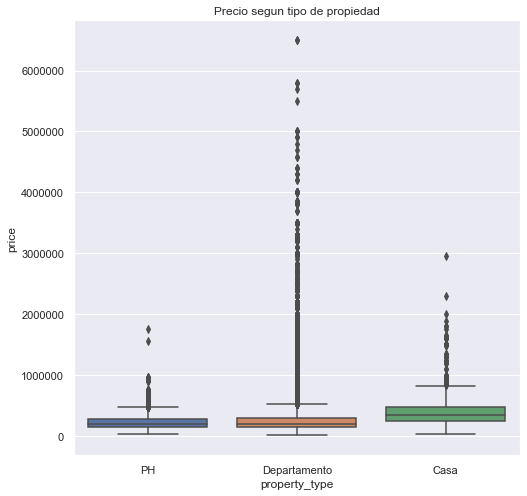

In [41]:
plt.figure(figsize=(8,8))
sns.boxplot(y='price',x='property_type',data=df2)
plt.title('Precio segun tipo de propiedad')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Vemos que el grafico es poco util ya que hay valores demasiado altos. Ejemplo precios mayores a 6.000.000 m usd

In [63]:
percentiles = [0.01,0.05,0.95,0.98]
for i in percentiles:
    print(f'percentil {i}:',df2.price.quantile(i).round(0))

percentil 0.01: 70000.0
percentil 0.05: 90118.0
percentil 0.95: 680520.0
percentil 0.98: 1100000.0


Vamos a filtrar los precios entre 70.000 y 1.000.000 usd ya que en ese rango se encuentran la mayor cantidad de datos y reducimos los outliers

In [64]:
df2 = df2[(df2['price']>70000) & (df2['price']<1000000 )]

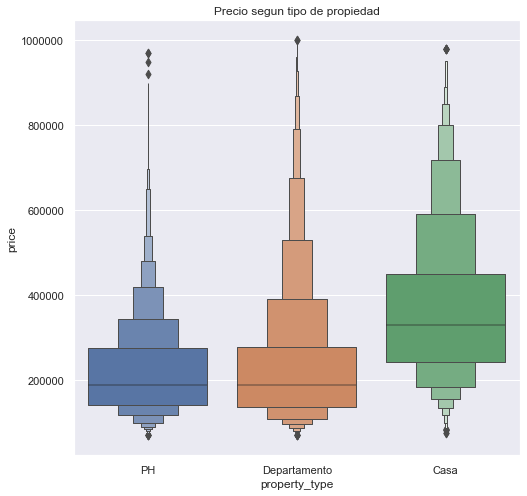

In [65]:
plt.figure(figsize=(8,8))
sns.boxenplot(y='price',x='property_type',data=df2)
plt.title('Precio segun tipo de propiedad')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Vemos que logicamente las casas tienen mayores precios (correlacion con superficie). Departamentos y PHs tienen distribuciones parecidas

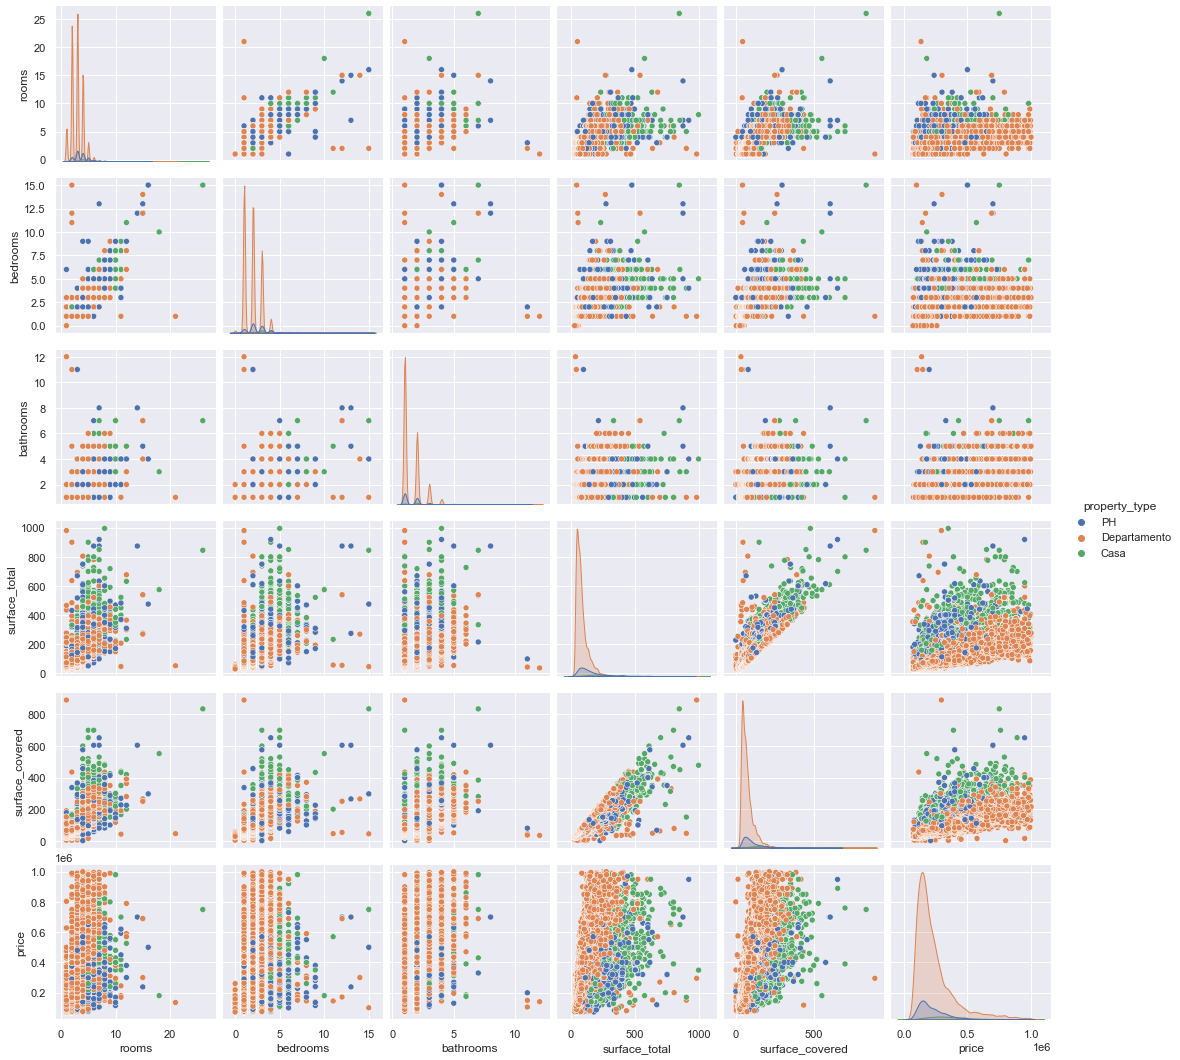

In [66]:
sns.pairplot(df2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price','property_type']],hue='property_type')

# Vemos las correlaciones segun el tipo de propiedad

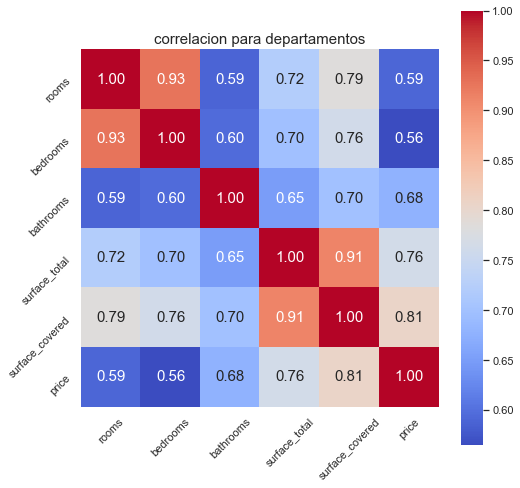

In [68]:
df3 = df2[df2['property_type'] == 'Departamento']
corr = df3[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('correlacion para departamentos',fontsize=15)
plt.show()

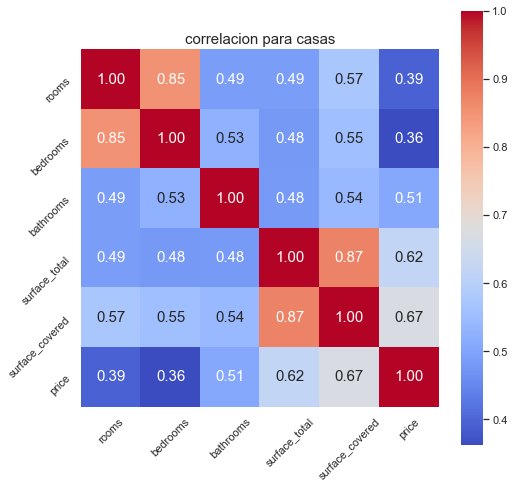

In [69]:
df4 = df2[df2['property_type'] == 'Casa']
corr = df4[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('correlacion para casas',fontsize=15)
plt.show()

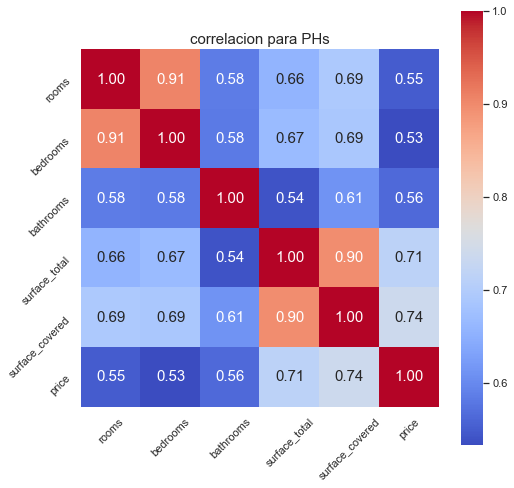

In [70]:
df5 = df2[df2['property_type'] == 'PH']
corr = df5[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('correlacion para PHs',fontsize=15)
plt.show()

Vemos que la superficie cubierta es la que mayor correlacion tiene con el precio en todos los casos. En los departamentos las correlaciones son mayores

# Empezamos con el armado de modelos para predecir el precio de las propiedades

Voy a evaluar los resultados de los modelos con el desvio promedio y el error absoluto promedio

Utilizo el desvio promedio ya que queremos castigar a los valores mas lejos del real. 

Utilizo error absoluto promedio para observar mas facilmente el error promedio de las predicciones en terminos absolutos.

In [112]:
# importo las librerias que vamos a usar

In [113]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [116]:
# armo una funcion para ver el cross validated score y una funcion para ver el score en el train set y en el test set

In [118]:
def evaluacion_final(modelo,X_train,y_train,X_test,y_test):
    modelo.fit(X_train,y_train)
    pred_train = modelo.predict(X_train)
    pred_test = modelo.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(pred_train,y_train))
    rmse_test = np.sqrt(mean_squared_error(pred_test,y_test))
    mae_train = mean_absolute_error(pred_train,y_train)
    mae_test = mean_absolute_error(pred_test,y_test)
    print(f'MAE_Train: {mae_train}')
    print(f'MAE_Test: {mae_test}')
    print(f'RMSE en train es: {int(rmse_train)}')
    print(f'RMSE en test es: {int(rmse_test)}')

In [131]:
def evaluar_rendimiento(modelo, nombre, X_train, y_train):
    s_rmse = cross_val_score(modelo, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    s_mae = cross_val_score(modelo, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')
    mean1 = s_rmse.mean()
    mean2 = s_mae.mean()
    std1= s_rmse.std()
    std2 = s_mae.std()
    print(f'CV RMSE en {nombre} es:{int(mean1)*-1} ± {int(std1)}')
    print(f'CV MAE en {nombre} es:{int(mean2)*-1} ± {int(std2)}')

In [ ]:
# Empezamos cargando el dataset nuevamente para hacer el preprocesamiento

In [162]:
datos_nuevos = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [163]:
# vemos si hay datos duplicados

In [164]:
datos = datos_nuevos.drop_duplicates()
print(f'Numero de instancias duplicadas', datos_nuevos.shape[0]-datos.shape[0])
print(f'Numero de instancias del dataset filtrado', datos.shape[0])


Numero de instancias duplicadas 2358
Numero de instancias del dataset filtrado 144302


In [165]:
#utilizo los mismos filtros que en el proyecto 1

In [166]:
datos = datos[datos.l2=='Capital Federal']

In [167]:
datos = datos[(datos['property_type'] == 'Departamento') | (datos['property_type'] == 'Casa')| (datos['property_type'] == 'PH') ]

In [168]:
datos.shape

(89874, 19)

In [169]:
datos = datos[(datos['surface_total']>=15) & (datos['surface_total']<=1000)]

In [170]:
datos = datos[(datos['surface_covered']>=15) & (datos['surface_covered']<=1000)]

In [171]:
datos = datos[(datos['price']<=600000 )]

In [172]:
datos.shape

(78298, 19)

In [173]:
superficies_incorrectas = datos.loc[datos.surface_total < datos.surface_covered]
print(len(superficies_incorrectas))
superficies_correctas = datos.loc[datos.surface_total >= datos.surface_covered]
print(len(superficies_correctas))

708
77590


In [174]:
# vemos que hay 708 valores incorrectos
#invierto aquellos valores que son incorrectos

In [175]:
datos.loc[superficies_incorrectas.index,'surface_total'] = superficies_incorrectas.surface_covered
datos.loc[superficies_incorrectas.index,'surface_covered'] = superficies_incorrectas.surface_total


In [ ]:
# armo una funcion que me deja unicamente con los valores entre el percentil 5 y 95 de la distribucion

In [177]:
def eliminar_outliers(datos):
    q1, q2 = datos.quantile(0.05), datos.quantile(0.95)
    datos =  datos[(datos>=q1) & (datos<=q2)]
    return datos

In [178]:
cols = ['rooms', 'bedrooms', 'bathrooms']
for i in cols:
    datos[i] = eliminar_outliers(datos[i])

In [181]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 146557
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       78298 non-null  object 
 1   end_date         78298 non-null  object 
 2   created_on       78298 non-null  object 
 3   lat              74508 non-null  float64
 4   lon              74508 non-null  float64
 5   l1               78298 non-null  object 
 6   l2               78298 non-null  object 
 7   l3               78298 non-null  object 
 8   rooms            75959 non-null  float64
 9   bedrooms         76786 non-null  float64
 10  bathrooms        75631 non-null  float64
 11  surface_total    78298 non-null  float64
 12  surface_covered  78298 non-null  float64
 13  price            78298 non-null  float64
 14  currency         78298 non-null  object 
 15  title            78298 non-null  object 
 16  description      78298 non-null  object 
 17  property_ty

In [182]:
datos.isna().sum()

start_date            0
end_date              0
created_on            0
lat                3790
lon                3790
l1                    0
l2                    0
l3                    0
rooms              2339
bedrooms           1512
bathrooms          2667
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [183]:
# vamos a rellenar los datos faltantes con la mediana

In [186]:
col_na = ['rooms','bedrooms','bathrooms', 'surface_total','surface_covered']
for i in col_na:
    datos[i].fillna(datos[i].median(),inplace=True)

In [187]:
#elimina las instancias con valores de lat/lon faltantes
datos.dropna(inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74508 entries, 0 to 146557
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       74508 non-null  object 
 1   end_date         74508 non-null  object 
 2   created_on       74508 non-null  object 
 3   lat              74508 non-null  float64
 4   lon              74508 non-null  float64
 5   l1               74508 non-null  object 
 6   l2               74508 non-null  object 
 7   l3               74508 non-null  object 
 8   rooms            74508 non-null  float64
 9   bedrooms         74508 non-null  float64
 10  bathrooms        74508 non-null  float64
 11  surface_total    74508 non-null  float64
 12  surface_covered  74508 non-null  float64
 13  price            74508 non-null  float64
 14  currency         74508 non-null  object 
 15  title            74508 non-null  object 
 16  description      74508 non-null  object 
 17  property_ty

In [188]:
datos.describe()
#ahora los datos tienen mas sentido

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74508.000000,74508.000000,74508.000000,74508.000000,74508.000000,74508.000000,74508.000000,74508.000000
mean,-34.598692,-58.435807,2.841413,1.922827,1.409634,89.832072,76.911043,222098.000000
std,0.023568,0.035629,1.020231,0.890145,0.624057,68.058155,51.782811,153708.492821
min,-34.696419,-58.530468,1.000000,1.000000,1.000000,15.000000,15.000000,6000.000000
25%,-34.612664,-58.458992,2.000000,1.000000,1.000000,49.000000,44.000000,121500.000000
50%,-34.599003,-58.433385,3.000000,2.000000,1.000000,70.000000,61.000000,175000.000000
75%,-34.584795,-58.410998,4.000000,3.000000,2.000000,105.000000,91.000000,265000.000000
max,-34.535909,-58.353930,5.000000,4.000000,3.000000,1000.000000,891.000000,1000000.000000


In [189]:
X = datos.drop(['price'],axis=1)
y = datos.price
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101)

In [ ]:
# estandarizamos los valores y agregamos las variables categoricas

In [190]:
column_trans = make_column_transformer((StandardScaler(),['bedrooms','rooms', 'bathrooms', 'surface_covered','surface_total','lat','lon']), (OneHotEncoder(), ['property_type','l3']))

In [191]:
X_train_new = column_trans.fit_transform(X_train)
X_test_new =column_trans.transform(X_test)

In [192]:
cat_feat = list(column_trans.named_transformers_.onehotencoder.get_feature_names())

In [193]:
num_feat = ['bedrooms', 'rooms','bathrooms', 'surface_covered','surface_total','lat','lon']

In [194]:
feat = num_feat + cat_feat

In [195]:
X_train_new.shape

(55881, 67)

In [ ]:
dtree = DecisionTreeRegressor()

In [197]:
# modelo benchmark
print(evaluar_rendimiento(dtree, 'Arbol de Decision',X_train_new,y_train))

CV RMSE en Arbol de Decision es:56045 ± 663
CV MAE en Arbol de Decision es:25604 ± 249
None


In [57]:
# vemos una mejora sustancial con respecto al rmse original de aprox 100k

In [198]:
# probamos con un modelo de ensamble como Random Forest

In [199]:
rf = RandomForestRegressor()

In [200]:
evaluar_rendimiento(rf, 'Random Forest',X_train_new,y_train)

CV RMSE en Random Forest es:42927 ± 485
CV MAE en Random Forest es:21941 ± 207


In [201]:
evaluacion_final(rf,X_train_new,y_train,X_test_new,y_test)

MAE_Train: 8216.880614723395
MAE_Test: 19278.88504106621
RMSE en train es: 15647
RMSE en test es: 40271


In [202]:
# vemos como el modelo de Random Forest tiene mejor performance que solo Arboles de decision

In [203]:
rf.fit(X_train_new,y_train)
rf_pred_train = rf.predict(X_train_new)
rf_pred_test = rf.predict(X_test_new)

C:\Users\QA\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='importances'>

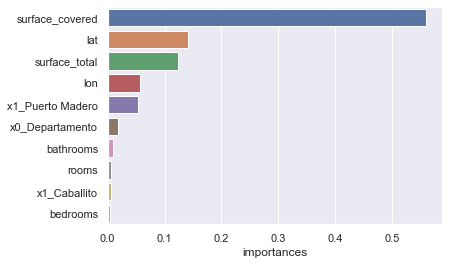

In [204]:
importances = list(rf.feature_importances_)
impo = pd.DataFrame(data=importances,index=feat)
impo.columns = ['importances']
impo = impo.sort_values('importances',ascending=False)
sns.barplot(impo.head(10).importances,impo.head(10).index)

In [205]:
# nuevamente la superficie cubierta es la variable con mayor importancia en el modelo

C:\Users\QA\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='importances'>

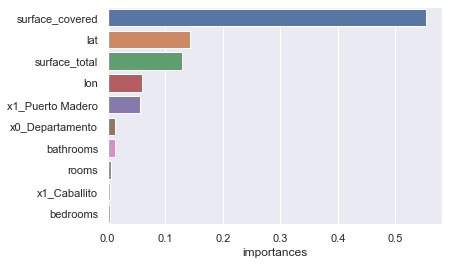

In [206]:
rf_tree = rf.estimators_[50]
importance_tree = list(rf_tree.feature_importances_)
impo_tree = pd.DataFrame(data=importance_tree,index=feat)
impo_tree.columns = ['importances']
impo_tree = impo_tree.sort_values('importances',ascending=False)
sns.barplot(impo_tree.head(10).importances,impo_tree.head(10).index)

In [207]:
# agarrando un arbol al azar obtenemos las mismas importancias

In [208]:
#REDUCIMOS LAS DIMENSIONES CON TRUNCATED SVD PARA OPTIMIZAR EL TIEMPO DE ENTRENAMIENTO

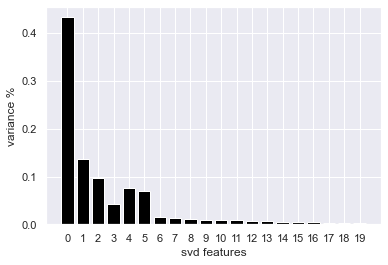

In [209]:
svd_opt = TruncatedSVD(n_components=20)
svd_components = svd_opt.fit_transform(X_train_new)
features = range(svd_opt.n_components)
plt.bar(features, svd_opt.explained_variance_ratio_, color='black')
plt.xlabel('svd features')
plt.ylabel('variance %')
plt.xticks(features)
SVD_components = pd.DataFrame(svd_components)

In [210]:
# usando las primeras 6 features ya obtenemos mas del 80% de la varianza

In [212]:
svd = TruncatedSVD(n_components=6)
X_train_final = svd.fit_transform(X_train_new)
X_test_final = svd.transform(X_test_new)

In [213]:
X_train_final.shape

(55881, 6)

In [73]:
# vemos un modelo de ridge con diferentes grados

In [215]:
for i in range(1,3):
    poly = PolynomialFeatures(degree=i,include_bias=False)
    X_train_final_poly = poly.fit_transform(X_train_final)
    rid = Ridge(10)
    print(f'degree={i}')
    print(evaluar_rendimiento(rid, 'Ridge',X_train_final_poly,y_train))

degree=1
CV RMSE en Ridge es:88886 ± 750
CV MAE en Ridge es:56793 ± 80
None
degree=2
CV RMSE en Ridge es:75517 ± 385
CV MAE en Ridge es:47329 ± 90
None


In [ ]:
# vemos como cambia la performance con diferentes valores de alpha

In [216]:
for i in range(1,100,20):
    poly = PolynomialFeatures(degree=3,include_bias=False)
    X_train_final_poly = poly.fit_transform(X_train_final)
    rid = Ridge(alpha=i/10)
    rid.fit(X_train_new,y_train)
    print(f'alpha={i/10}')
    print(evaluar_rendimiento(rid, 'Ridge',X_train_final,y_train))

alpha=0.1
CV RMSE en Ridge es:88886 ± 751
CV MAE en Ridge es:56799 ± 80
None
alpha=2.1
CV RMSE en Ridge es:88886 ± 751
CV MAE en Ridge es:56798 ± 80
None
alpha=4.1
CV RMSE en Ridge es:88886 ± 751
CV MAE en Ridge es:56797 ± 80
None
alpha=6.1
CV RMSE en Ridge es:88886 ± 751
CV MAE en Ridge es:56795 ± 80
None
alpha=8.1
CV RMSE en Ridge es:88886 ± 750
CV MAE en Ridge es:56794 ± 80
None


In [219]:
# Probamos el modelo de XGBOOST
import xgboost as xg
xgb = xg.XGBRegressor()

In [220]:
param = dict()
param['max_depth'] = np.arange(2,10)
param['eta'] = np.linspace(0.2,2,10)
param['max_leaves'] = np.arange(2,10)

# define search
search = RandomizedSearchCV(xgb, param, n_iter=5, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=3, random_state=1)
# execute search
result = search.fit(X_train_final, y_train)


In [221]:
result.best_score_

-54911.11180718185

In [222]:
from sklearn.model_selection import learning_curve

In [223]:
rf_0 = RandomForestRegressor()

In [224]:
train_sizes,train_scores,valid_scores = learning_curve(rf_0,X_train_final,y_train,train_sizes=np.linspace(0.0001,1,20),scoring='neg_root_mean_squared_error',cv=3)

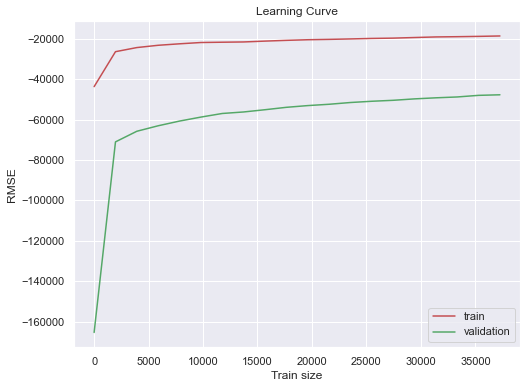

In [225]:
plt.figure(figsize=(8,6))
plt.plot(train_sizes,train_scores.mean(axis=1),color='r',label='train')
plt.plot(train_sizes,valid_scores.mean(axis=1),color='g',label='validation')
plt.title('Learning Curve')
plt.ylabel('RMSE')
plt.xlabel('Train size')
plt.legend()
plt.show()

In [226]:
# Hay una distancia bastante grande entre el resultado en el validation set vs el train set indicando que 
# el modelo es muy complejo/overfitting y faltan mas datos

In [228]:
# optimizo los parametros del Random Forest
# le pongo un limite a los hiperparametros para que no sobreajusten demasiado

In [229]:
param_trees = {'n_estimators': [5, 100, 150], 
               'max_features': [1, 8, 21], 
               'max_depth': [5, 50, 100], 
               'min_samples_leaf':[1, 5, 50]}

In [230]:
grid_search_rf = GridSearchCV(rf_0, param_grid=param_trees, cv=3, verbose=1, n_jobs=3,scoring='neg_root_mean_squared_error')

In [231]:
grid_search_rf.fit(X_train_final, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   29.7s
[Parallel(n_jobs=3)]: Done 203 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done 243 out of 243 | elapsed:  2.7min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'max_depth': [5, 50, 100], 'max_features': [1, 8, 21],
                         'min_samples_leaf': [1, 5, 50],
                         'n_estimators': [5, 100, 150]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [232]:
print('Best score and parameter combination = ')

print(f'Mejores parametros: {grid_search_rf.best_params_}')
print(f'Mejor Score: {int(grid_search_rf.best_score_)*-1}')

Best score and parameter combination = 
Mejores parametros: {'max_depth': 50, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 100}
Mejor Score: 47043


In [233]:
rf_opt = RandomForestRegressor(max_depth = 50, max_features=1, min_samples_leaf = 1, n_estimators=150)

In [234]:
evaluacion_final(rf_opt,X_train_final,y_train,X_test_final,y_test)

MAE_Train: 8849.775946082798
MAE_Test: 21016.112000341593
RMSE en train es: 17044
RMSE en test es: 43443


In [235]:
# se podria regularizar aun mas pero vemos que este modelo tiene la mejor performance.
# la performance de Random Forest previo al SVD era mejor.
# Si hay tiempo conviene no usar el SVD

In [240]:
# vemos como el MAE es mucho menor debido a que hay predicciones muy lejanas al valor real

In [237]:
def errores(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

In [238]:
# vemos la distribucion de los errores

C:\Users\QA\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\QA\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


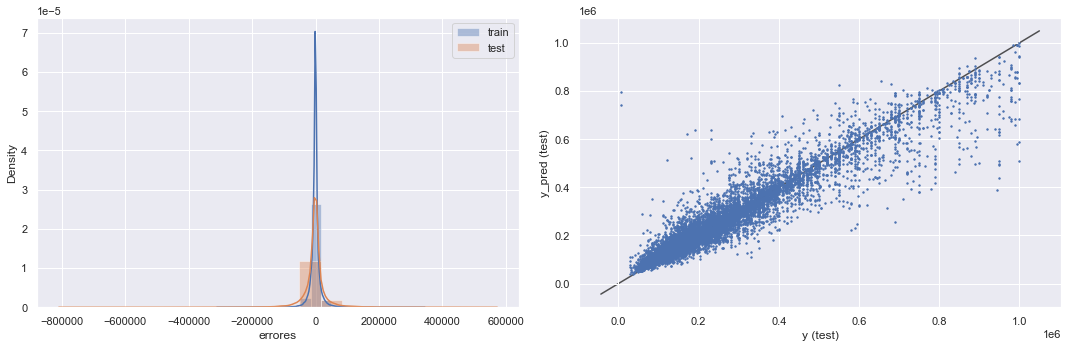

In [239]:
errores(rf_opt,X_train_final,X_test_final,y_train,y_test)

In [97]:
# vemos que el error es mayor en los precios mas altos (hay menos datos)

In [ ]:
# Analizamos el error para dataset con precios menores a 450.000 usd

In [242]:
datos2 = datos[(datos['price']<=450000 )]

In [243]:
X = datos2.drop(['price'],axis=1)
y = datos2.price
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101)

In [244]:
column_trans = make_column_transformer((StandardScaler(),['bedrooms','rooms', 'bathrooms', 'surface_covered','surface_total','lat','lon']), (OneHotEncoder(), ['property_type','l3']))

In [245]:
X_train_new = column_trans.fit_transform(X_train)
X_test_new =column_trans.transform(X_test)

In [246]:
evaluacion_final(rf,X_train_new,y_train,X_test_new,y_test)

MAE_Train: 6431.823274780848
MAE_Test: 14807.371172421266
RMSE en train es: 10711
RMSE en test es: 26518


In [ ]:
# filtrando por precios menor a 450000 mejora sustancialmente la performance del modelo especialmente el RMSE

# Como mejorar el desempeño del modelo:

Luego de probar varios modelos podemos concluir que el modelo de Random Forest tiene el mejor desempeño.
Se puede mejorar este desempeño haciendo una optimizacion de hiperparametros mas profunda y agregando mas datos al dataset.
Filtrar por precios menores tambien va a mejorar el error del modelo ya que vimos que el error es mayor para los precios mas altos. Tambien se puede seguir regularizando el modelo para reducir el overfitting